In [1]:
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import glob
import datetime

%matplotlib inline

In [2]:
date_start = '2017-01-01'
date_end   = '2017-04-23'

df = pd.read_csv(
    './data/cur.zentrum.nibelungenbruecke.traffic.risc-software.at.csv', 
    parse_dates = [0], 
    index_col = 0
)
df = df[date_start:date_end]
print df.columns

Index([u'delay', u'average_speed', u'delayed_average_speed', u'total_distance',
       u'total_duration', u'total_duration_in_traffic', u'day', u'dow', u'hod',
       u'working_day'],
      dtype='object')


In [3]:
def history_average(history_data, current_data):
    history_data['tod'] = history_data.index.time
    current_data['tod'] = current_data.index.time
    mean_wod = [history_data.wod == True  ].groupby('tod').mean().reset_index()
    mean_wnd = [history_data.wod == False ].groupby('tod').mean()
    std_wod  = [history_data.wod == True  ].groupby('tod').mean()
    std_wnd  = [history_data.wod == False ].groupby('tod').mean()
    
    current_data
    

In [4]:
h_data = df['2017-03-01':'2017-04-14'].copy()
c_data = df['2017-04-18':'2017-04-18'].copy()

In [5]:
h_data['tod'] = h_data.index.time
c_data['tod'] = c_data.index.time

In [6]:
mean_wod = h_data[h_data.working_day == True  ].groupby('tod').mean().reset_index()
mean_wnd = h_data[h_data.working_day == False ].groupby('tod').mean().reset_index()

std_wod  = h_data[['tod','delay']][h_data.working_day == True  ].groupby('tod').std().reset_index()
std_wnd  = h_data[['tod','delay']][h_data.working_day == False ].groupby('tod').std().reset_index()

In [7]:
c_data['delta'] = np.zeros(c_data.shape[0])
c_data['delay_std' ] = np.zeros(c_data.shape[0])
c_data['delay_mean'] = np.zeros(c_data.shape[0])

In [8]:
for i in range(0,mean_wod.tod.shape[0]):
    #c_data.loc[(c_data.tod == mean_wod.tod[i] ) & (c_data.working_day == True), 'delta'     ] = c_data[(c_data.tod == mean_wod.tod[i] ) & (c_data.working_day == True)].delay - mean_wod.delay[i]
    c_data.loc[(c_data.tod == std_wod.tod[i] ) & (c_data.working_day == True), 'delay_std' ]  = std_wod.delay[i]
    c_data.loc[(c_data.tod == mean_wod.tod[i] ) & (c_data.working_day == True), 'delay_mean'] = mean_wod.delay[i]
    
for i in range(0,mean_wod.tod.shape[0]):
    #c_data.loc[(c_data.tod == mean_wnd.tod[i] ) & (c_data.working_day == False),'delta'     ] = c_data[(c_data.tod == mean_wnd.tod[i] ) & (c_data.working_day == False)].delay - mean_wnd.delay[i]
    c_data.loc[(c_data.tod == std_wnd.tod[i] ) & (c_data.working_day == False),'delay_std' ]  = std_wnd.delay[i]
    c_data.loc[(c_data.tod == mean_wnd.tod[i] ) & (c_data.working_day == False),'delay_mean'] = mean_wnd.delay[i]

In [9]:
c_data['delta'] = c_data.delay - c_data.delay_mean
c_data.loc[c_data.delta  < 0, 'delta' ] = 0 

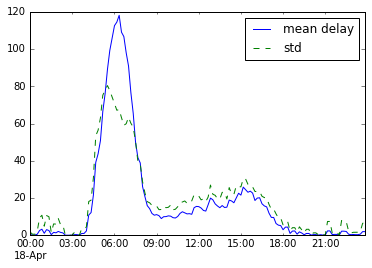

In [10]:
c_data.delay_mean.plot(ls='-', label = 'mean delay')
c_data.delay_std.plot(ls='--', label = 'std')
plt.legend()

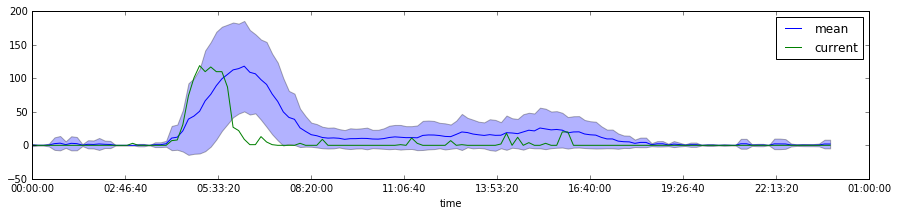

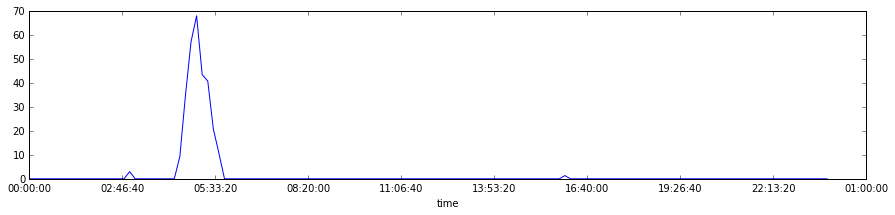

In [11]:
plt.figure(figsize=(15,3))
plt.plot(mean_wod.tod.values, mean_wod.delay, label = 'mean')
plt.fill_between(mean_wod.tod.values,
                 (mean_wod.delay - std_wod.delay),
                 (mean_wod.delay + std_wod.delay), 
                 alpha=0.3)
plt.plot(c_data.tod, c_data.delay, label = 'current')
plt.legend()
plt.show()
plt.figure(figsize=(15,3))
plt.plot(c_data.tod, c_data.delta, label = 'difference')
plt.show()

In [12]:
from scipy.stats import norm
from scipy import stats

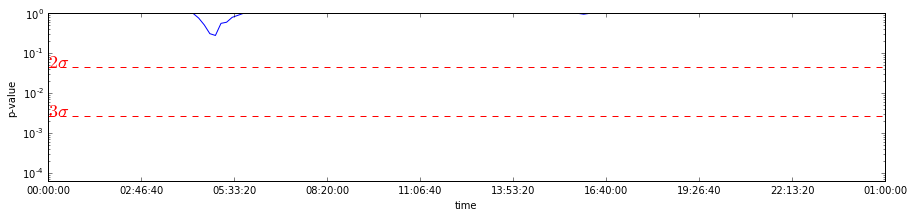

In [13]:
plt.figure(figsize=(15,3))
c_data['unexpected_event'] = [norm.sf(c_data.delta[i]/c_data.delay_std[i])*2 if c_data.delay_std[i]!=0 else 1 for i in range(c_data.delay_std.shape[0])]
plt.plot(c_data.tod,c_data.unexpected_event, label = 'difference')
plt.axhline(y=norm.sf(2)*2, ls='--', c='red') 
plt.axhline(y=norm.sf(3)*2, ls='--', c='red') 
plt.text(0,norm.sf(2)*2, '$2\sigma$', rotation=0, fontsize=18, color='red')
plt.text(0,norm.sf(3)*2, '$3\sigma$', rotation=0, fontsize=18, color='red')
plt.ylim([norm.sf(4)*2, 1])
plt.ylabel('p-value')
plt.yscale('log')
plt.show()

# Linz Marathon and unxpected delay

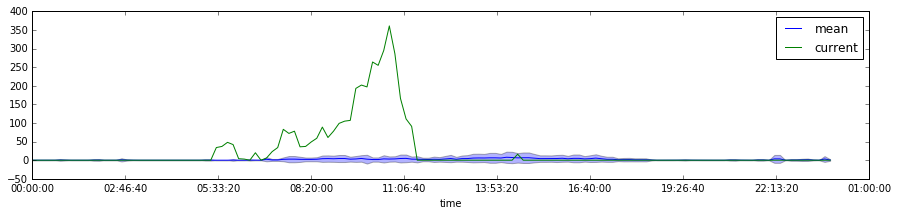

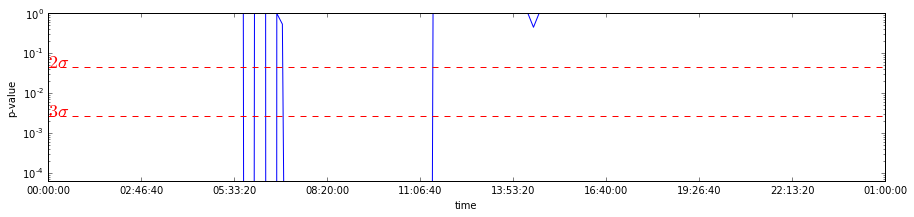

In [18]:
h_data = df['2017-02-01':'2017-04-08'].copy()
c_data = df['2017-04-09':'2017-04-09'].copy()

h_data['tod'] = h_data.index.time
c_data['tod'] = c_data.index.time

mean_wod = h_data[h_data.working_day == True  ].groupby('tod').mean().reset_index()
mean_wnd = h_data[h_data.working_day == False ].groupby('tod').mean().reset_index()

std_wod  = h_data[['tod','delay']][h_data.working_day == True  ].groupby('tod').std().reset_index()
std_wnd  = h_data[['tod','delay']][h_data.working_day == False ].groupby('tod').std().reset_index()

c_data['delta'] = np.zeros(c_data.shape[0])
c_data['delay_std' ] = np.zeros(c_data.shape[0])
c_data['delay_mean'] = np.zeros(c_data.shape[0])

for i in range(0,mean_wod.tod.shape[0]):
    #c_data.loc[(c_data.tod == mean_wod.tod[i] ) & (c_data.working_day == True), 'delta'     ] = c_data[(c_data.tod == mean_wod.tod[i] ) & (c_data.working_day == True)].delay - mean_wod.delay[i]
    c_data.loc[(c_data.tod == std_wod.tod[i] ) & (c_data.working_day == True), 'delay_std' ]  = std_wod.delay[i]
    c_data.loc[(c_data.tod == mean_wod.tod[i] ) & (c_data.working_day == True), 'delay_mean'] = mean_wod.delay[i]
    
for i in range(0,mean_wod.tod.shape[0]):
    #c_data.loc[(c_data.tod == mean_wnd.tod[i] ) & (c_data.working_day == False),'delta'     ] = c_data[(c_data.tod == mean_wnd.tod[i] ) & (c_data.working_day == False)].delay - mean_wnd.delay[i]
    c_data.loc[(c_data.tod == std_wnd.tod[i] ) & (c_data.working_day == False),'delay_std' ]  = std_wnd.delay[i]
    c_data.loc[(c_data.tod == mean_wnd.tod[i] ) & (c_data.working_day == False),'delay_mean'] = mean_wnd.delay[i]
    
c_data['delta'] = c_data.delay - c_data.delay_mean
c_data.loc[c_data.delta  < 0, 'delta' ] = 0 

plt.figure(figsize=(15,3))
plt.plot(mean_wnd.tod.values, mean_wnd.delay, label = 'mean')
plt.fill_between(mean_wnd.tod.values,
                 (mean_wnd.delay - std_wnd.delay),
                 (mean_wnd.delay + std_wnd.delay), 
                 alpha=0.3)
plt.plot(c_data.tod, c_data.delay, label = 'current')
plt.legend()
plt.show()

plt.figure(figsize=(15,3))
c_data['unexpected_event'] = [norm.sf(c_data.delta[i]/c_data.delay_std[i])*2 if c_data.delay_std[i]!=0 else 1 for i in range(c_data.delay_std.shape[0])]
plt.plot(c_data.tod,c_data.unexpected_event, label = 'difference')
plt.axhline(y=norm.sf(2)*2, ls='--', c='red') 
plt.axhline(y=norm.sf(3)*2, ls='--', c='red') 
plt.text(0,norm.sf(2)*2, '$2\sigma$', rotation=0, fontsize=18, color='red')
plt.text(0,norm.sf(3)*2, '$3\sigma$', rotation=0, fontsize=18, color='red')
plt.ylabel('p-value')
plt.ylim([norm.sf(4)*2, 1])
plt.yscale('log')
plt.show()

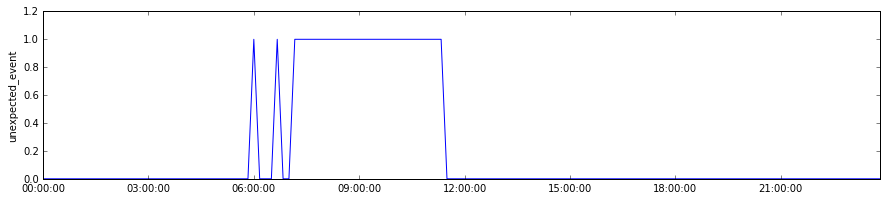

In [19]:
plt.figure(figsize=(15,3))
c_data['has_unexpected_event']  = [ 1 if c_data.unexpected_event[i]<norm.sf(3)*2 else 0 for i in range(c_data.unexpected_event.shape[0])]
plt.plot(c_data['has_unexpected_event'])
plt.ylabel('unexpected_event')
plt.ylim([0,1.2])
plt.show()